# **Stock Price Prediction**

Importing *Libraries*

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

Reading Stock *Dataset*

In [5]:
df = pd.read_csv("WIPRO_stock_dataset.csv")

Extracting "Close" Column

In [6]:
df.head

<bound method NDFrame.head of             Date Symbol Series  Prev Close     Open     High      Low  \
0     2000-01-03  WIPRO     EQ     2522.40  2724.00  2724.20  2724.00   
1     2000-01-04  WIPRO     EQ     2724.20  2942.15  2942.15  2942.15   
2     2000-01-05  WIPRO     EQ     2942.15  2942.15  3177.55  2715.00   
3     2000-01-06  WIPRO     EQ     2990.10  3144.70  3183.00  2790.00   
4     2000-01-07  WIPRO     EQ     2932.25  2751.00  2751.00  2697.70   
...          ...    ...    ...         ...      ...      ...      ...   
5301  2021-04-26  WIPRO     EQ      475.70   479.40   483.85   477.00   
5302  2021-04-27  WIPRO     EQ      480.30   481.40   487.00   481.00   
5303  2021-04-28  WIPRO     EQ      485.05   485.85   493.20   481.25   
5304  2021-04-29  WIPRO     EQ      489.30   492.70   492.80   485.70   
5305  2021-04-30  WIPRO     EQ      489.85   491.50   511.80   489.30   

         Last    Close     VWAP    Volume      Turnover    Trades  \
0     2724.20  2724.20  

In [4]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))

Scalling The Data

In [5]:
Scale = MinMaxScaler(feature_range=(0, 1))
scaled_data = Scale.fit_transform(dataset)

*Training Dataset*

In [6]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

Format for (Long Short-Term Memory) LSTM

In [7]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Building Model

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

*Training* The Model

In [12]:
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
4185/4185 [==============================] - 153s 35ms/step - loss: 2.4974e-04
Epoch 2/5
4185/4185 [==============================] - 149s 36ms/step - loss: 1.2307e-04
Epoch 3/5
4185/4185 [==============================] - 155s 37ms/step - loss: 8.4206e-05
Epoch 4/5
4185/4185 [==============================] - 160s 38ms/step - loss: 9.2128e-05
Epoch 5/5
4185/4185 [==============================] - 153s 37ms/step - loss: 6.6172e-05



*Testing Dataset*

In [13]:
tested_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(tested_data)):
    x_test.append(tested_data[i - 60:i, 0])

In [14]:
x_test = np.array(x_test)

In [15]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
predictions = model.predict(x_test)
predictions = Scale.inverse_transform(predictions)

34/34 [==============================] - 2s 21ms/step


Calculating Root Mean Square Error

In [17]:
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 13.967113156188333


Visualising The data

C:\Users\pc\AppData\Local\Temp\ipykernel_1028\90838933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


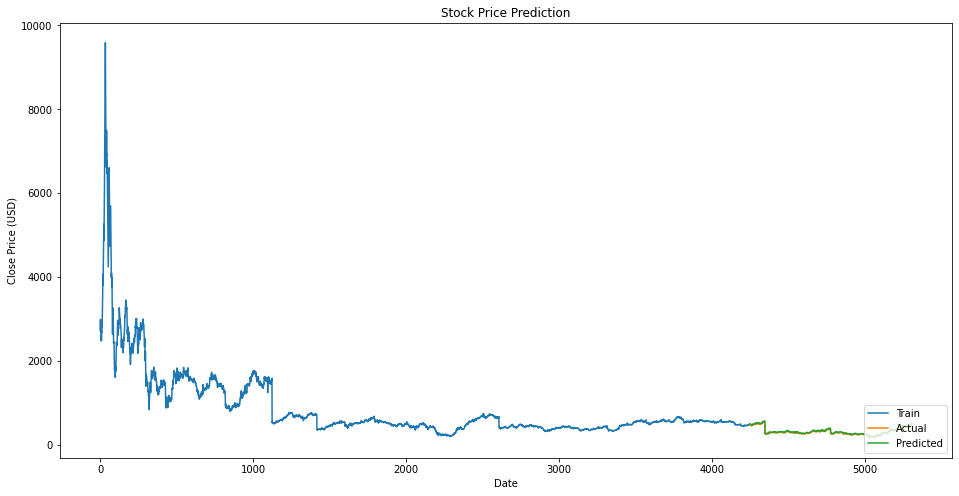

In [18]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predicted'], loc='lower right')
plt.show()

END.